In [1]:



















!pip install textblob

# Sentiment Analysis using TextBlob

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from textblob import TextBlob




file_path = r"C:\Users\Gayatri\OneDrive\Desktop\comments.txt"  
  

with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()


def extract_comment(line):
    match = re.match(r"\[\d+\]\s[\w\d_.]+:\s(.+)", line)  
    return match.group(1) if match else ""


df = pd.DataFrame(lines, columns=['raw_text'])


df['comment_text'] = df['raw_text'].apply(extract_comment)


df = df[df['comment_text'].str.strip() != ""]


heart_emoji_pattern = re.compile(r'[\U00002764\U0001F49B-\U0001F49F]', flags=re.UNICODE)
df = df[~df['comment_text'].str.contains(heart_emoji_pattern, na=False)]

In [4]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

## Add polarity and sentiment columns
df['text_polarity'] = df['comment_text'].apply(getPolarity)
df['sentiment'] = pd.cut(df['text_polarity'], [-1, -0.0000000001, 0.0000000001, 1], 
                         labels=["Negative", "Neutral", "Positive"])        


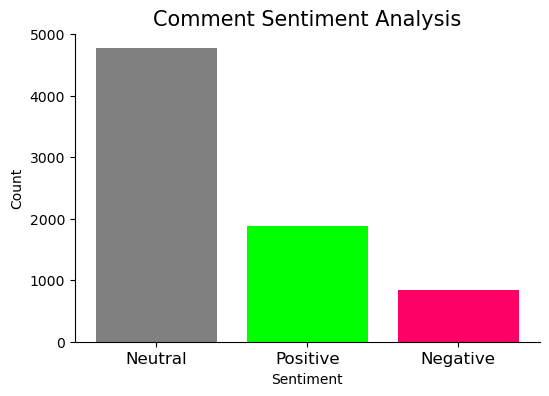

In [5]:
graph1 = df['sentiment'].value_counts().reset_index()
graph1.columns = ['sentiment', 'count']

colors = {"Negative": "#FF0066", "Neutral": "gray", "Positive": "#00FF00"}

## Plot bar chart
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(graph1["sentiment"], graph1["count"], color=[colors[s] for s in graph1["sentiment"]])

## Remove spines on right and top of plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title("Comment Sentiment Analysis", fontsize=15)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0, fontsize=12)
plt.show()

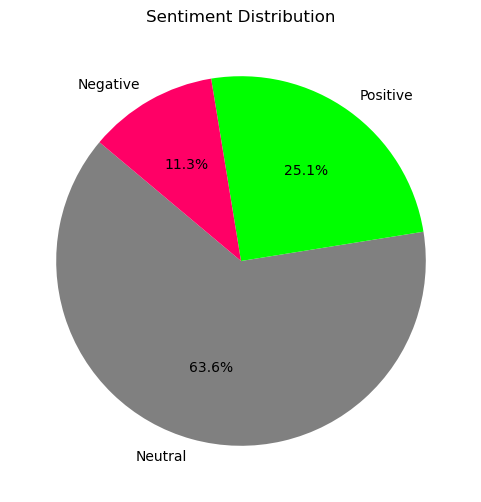

In [6]:
plt.figure(figsize=(6,6))
plt.pie(graph1['count'], labels=graph1['sentiment'], autopct='%1.1f%%', colors=[colors[s] for s in graph1['sentiment']], startangle=140)
plt.title("Sentiment Distribution")
plt.show()

# Analysis using MULTINOMIALNB

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

#######################################
## 1. Load and clean text file
#######################################

file_path =r"C:\Users\Gayatri\OneDrive\Desktop\comments.txt"    # Update if needed

with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

## Extract only the comment text (removing the index and username)
def extract_comment(line):
    match = re.match(r"\[\d+\]\s[\w\d_.]+:\s(.+)", line)  # Regex to capture comment text
    return match.group(1) if match else ""

## Convert to DataFrame
df = pd.DataFrame(lines, columns=['raw_text'])

## Apply extraction function
df['comment_text'] = df['raw_text'].apply(extract_comment)

## Remove empty rows (if any)
df = df[df['comment_text'].str.strip() != ""]

## Remove comments with heart emojis ❤️ 💖 💕 💗 etc.
heart_emoji_pattern = re.compile(r'[\U00002764\U0001F49B-\U0001F49F]', flags=re.UNICODE)
df = df[~df['comment_text'].str.contains(heart_emoji_pattern, na=False)]

In [9]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

## Add polarity and sentiment columns
df['text_polarity'] = df['comment_text'].apply(getPolarity)
df['sentiment'] = pd.cut(df['text_polarity'], [-1, -0.0000000001, 0.0000000001, 1], 
                         labels=["Negative", "Neutral", "Positive"])

In [10]:
df = df.dropna(subset=['sentiment'])  # Ensure no NaN values
df['sentiment_label'] = df['sentiment'].map({"Negative": 0, "Neutral": 1, "Positive": 2})

## Split dataset
X_train, X_test, y_train, y_test = train_test_split(df['comment_text'], df['sentiment_label'], test_size=0.2, random_state=42)
                 
## Create model pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

## Train model
model.fit(X_train, y_train)

## Predict on test data
y_pred = model.predict(X_test)

## Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8392261507671781
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.09      0.16       162
           1       0.89      0.96      0.92       956
           2       0.73      0.86      0.79       381

    accuracy                           0.84      1499
   macro avg       0.87      0.64      0.62      1499
weighted avg       0.86      0.84      0.80      1499



In [12]:
example_comments = [
    "Wow, this is amazing!",
    "I don't like this at all.",
    "It's okay, nothing special.",
    "I absolutely love it!",
    "This is the worst thing ever!"
]

predictions = model.predict(example_comments)
label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}

print("===== Example Predictions =====")
for comment, pred in zip(example_comments, predictions):
    print(f"'{comment}' -> {label_map[pred]}")

===== Example Predictions =====
'Wow, this is amazing!' -> Positive
'I don't like this at all.' -> Neutral
'It's okay, nothing special.' -> Positive
'I absolutely love it!' -> Positive
'This is the worst thing ever!' -> Positive


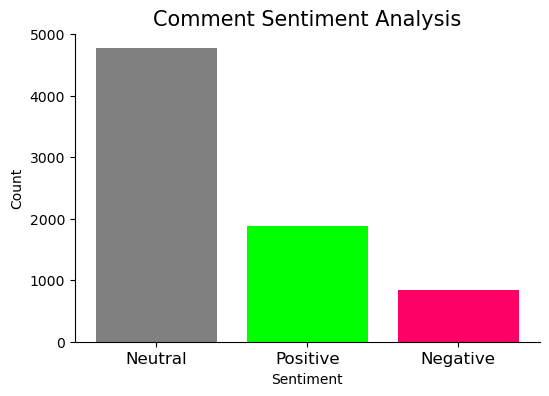

In [13]:
graph1 = df['sentiment'].value_counts().reset_index()
graph1.columns = ['sentiment', 'count']

colors = {"Negative": "#FF0066", "Neutral": "gray", "Positive": "#00FF00"}

## Plot bar chart
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(graph1["sentiment"], graph1["count"], color=[colors[s] for s in graph1["sentiment"]])

## Remove spines on right and top of plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title("Comment Sentiment Analysis", fontsize=15)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0, fontsize=12)
plt.show()


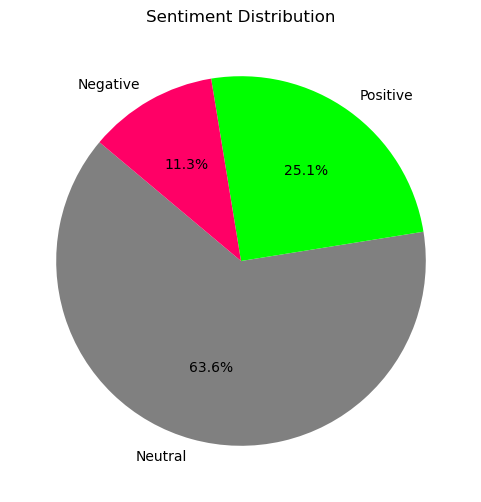

In [14]:
plt.figure(figsize=(6,6))
plt.pie(graph1['count'], labels=graph1['sentiment'], autopct='%1.1f%%', colors=[colors[s] for s in graph1['sentiment']], startangle=140)
plt.title("Sentiment Distribution")
plt.show()

# Analysis using Vadersentiment and Logistic Regression

In [16]:
!pip install vaderSentiment


Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.74       153
           1       0.88      0.87      0.87       386
           2       0.82      0.84      0.83       217

    accuracy                           0.83       756
   macro avg       0.81      0.82      0.81       756
weighted avg       0.83      0.83      0.83       756

===== Example Predictions =====
'Wow, this is amazing!' -> Positive
'I don't like this at all.' -> Positive
'It's okay, nothing special.' -> Positive
'I absolutely love it!' -> Positive
'This is the worst thing ever!' -> Negative
'Terrible experience, I'm disappointed.' -> Negative
'Not worth it at all.' -> Neutral
'Could be better, but I don't hate it.' -> Negative
'I feel so frustrated using this product.I hate you.' -> Negative


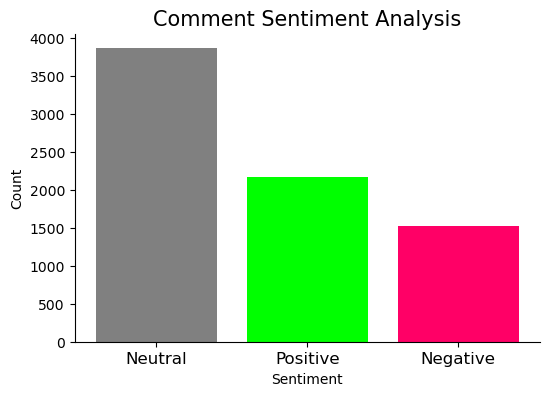

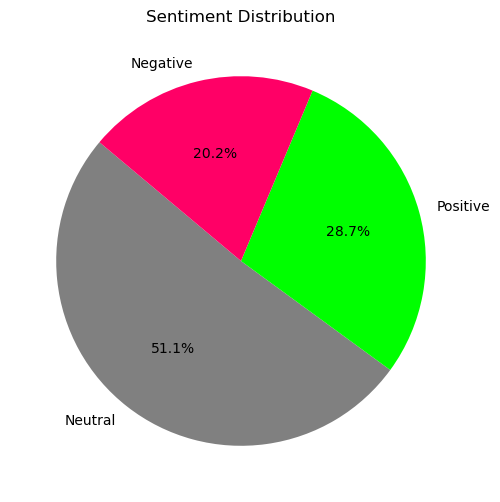

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#######################################
## 1. Load and Clean Text File
#######################################

file_path = r"C:\Users\Gayatri\OneDrive\Desktop\comments.txt"  # Update if needed

with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

## Extract only the comment text (removing the index and username)
def extract_comment(line):
    match = re.match(r"\[\d+\]\s[\w\d_.]+:\s(.+)", line)  # Regex to capture comment text
    return match.group(1) if match else ""

## Convert to DataFrame
df = pd.DataFrame(lines, columns=['raw_text'])

## Apply extraction function
df['comment_text'] = df['raw_text'].apply(extract_comment)

## Remove empty rows (if any)
df = df[df['comment_text'].str.strip() != ""]

## Remove comments with heart emojis ❤️ 💖 💕 💗 etc.
heart_emoji_pattern = re.compile(r'[\U00002764\U0001F49B-\U0001F49F]', flags=re.UNICODE)
df = df[~df['comment_text'].str.contains(heart_emoji_pattern, na=False)]

#######################################
## 2. Sentiment Analysis (VADER + TextBlob)
#######################################

## Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    """Combines VADER and TextBlob sentiment analysis for higher accuracy."""
    vader_score = analyzer.polarity_scores(text)['compound']
    blob_score = TextBlob(text).sentiment.polarity

    final_score = (vader_score + blob_score) / 2  # Weighted Average

    if final_score <= -0.1:
        return "Negative"
    elif final_score >= 0.1:
        return "Positive"
    else:
        return "Neutral"

## Apply sentiment classification
df['sentiment'] = df['comment_text'].apply(get_sentiment)

#######################################
## 3. Machine Learning Sentiment Analysis (Improved)
#######################################

## Convert sentiment labels to numeric values
df = df.dropna(subset=['sentiment'])  # Ensure no NaN values
df['sentiment_label'] = df['sentiment'].map({"Negative": 0, "Neutral": 1, "Positive": 2})

## Split dataset
X_train, X_test, y_train, y_test = train_test_split(df['comment_text'], df['sentiment_label'], test_size=0.1, random_state=42, stratify=df['sentiment_label'])

## Feature Engineering: TF-IDF with bigrams and stopwords removal
vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words="english")  
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## Use Logistic Regression (Better than Naïve Bayes)
model = LogisticRegression(class_weight="balanced", max_iter=20000)  
model.fit(X_train_tfidf, y_train)

## Predict on test data
y_pred = model.predict(X_test_tfidf)

## Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

#######################################
## 4. Example Predictions (Check if Negative is Higher)
#######################################

example_comments = [
    "Wow, this is amazing!",
    "I don't like this at all.",
    "It's okay, nothing special.",
    "I absolutely love it!",
    "This is the worst thing ever!",
    "Terrible experience, I'm disappointed.",
    "Not worth it at all.",
    "Could be better, but I don't hate it.",
    "I feel so frustrated using this product."
    "I hate you."
]

X_example_tfidf = vectorizer.transform(example_comments)
predictions = model.predict(X_example_tfidf)
label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}

print("===== Example Predictions =====")
for comment, pred in zip(example_comments, predictions):
    print(f"'{comment}' -> {label_map[pred]}")

#######################################
## 5. Plot Sentiment Counts
#######################################

## Count occurrences of each sentiment
graph1 = df['sentiment'].value_counts().reset_index()
graph1.columns = ['sentiment', 'count']

colors = {"Negative": "#FF0066", "Neutral": "gray", "Positive": "#00FF00"}

## Plot bar chart
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(graph1["sentiment"], graph1["count"], color=[colors[s] for s in graph1["sentiment"]])

## Remove spines on right and top of plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title("Comment Sentiment Analysis", fontsize=15)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0, fontsize=12)
plt.show()

#######################################
## 6. Pie Chart with Percentages
#######################################

plt.figure(figsize=(6,6))
plt.pie(graph1['count'], labels=graph1['sentiment'], autopct='%1.1f%%', colors=[colors[s] for s in graph1['sentiment']], startangle=140)
plt.title("Sentiment Distribution")
plt.show()


In [18]:
print(df.shape)
print(df.head())  # Check if there's any data


(7552, 4)
                                            raw_text  \
1                  [1] krisroyal90: Thor can board\n   
2        [2] ottavianoblitch: Enjoy, maes. Love ya\n   
3  [4] noelmulcair: The Matterhorn is such a beau...   
4                       [5] nathanbhayden: Send it\n   
5  [6] franckkitto_70_s: Un petit bonjour d'Espag...   

                      comment_text sentiment  sentiment_label  
1                   Thor can board   Neutral                1  
2             Enjoy, maes. Love ya  Positive                2  
3  The Matterhorn is such a beauty  Positive                2  
4                          Send it   Neutral                1  
5       Un petit bonjour d'Espagne   Neutral                1  


# Using both VADER and TextBlob(Manually deleting non-english comments)

Accuracy: 0.8614130434782609
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.79       152
           1       0.90      0.88      0.89       377
           2       0.83      0.90      0.86       207

    accuracy                           0.86       736
   macro avg       0.85      0.85      0.85       736
weighted avg       0.86      0.86      0.86       736

===== Example Predictions =====
'Wow, this is amazing!' -> Positive
'I don't like this at all.' -> Positive
'It's okay, nothing special.' -> Positive
'I absolutely love it!' -> Positive
'This is the worst thing ever!' -> Negative
'Terrible experience, I'm disappointed.' -> Negative
'Not worth it at all.' -> Neutral
'Could be better, but I don't hate it.' -> Negative
'I feel so frustrated using this product.I hate you.' -> Negative


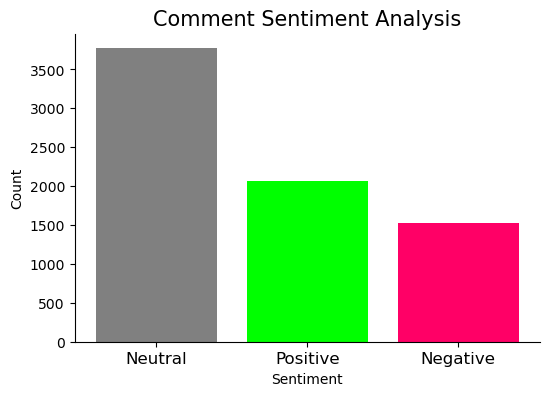

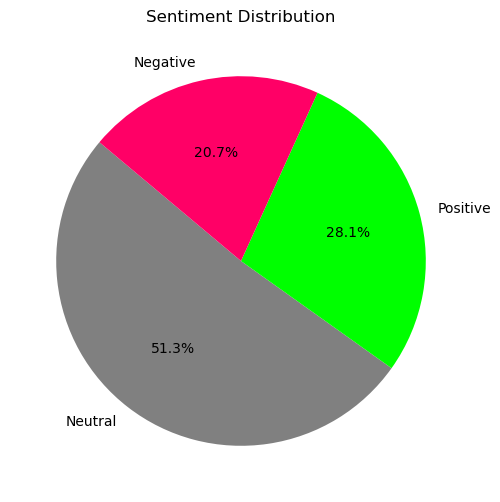

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#######################################
## 1. Load and Clean Text File
#######################################

file_path = r"C:\Users\Gayatri\OneDrive\Desktop\fin.txt"  # Update if needed

with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

## Extract only the comment text (removing the index and username)
def extract_comment(line):
    match = re.match(r"\[\d+\]\s[\w\d_.]+:\s(.+)", line)  # Regex to capture comment text
    return match.group(1) if match else ""

## Convert to DataFrame
df = pd.DataFrame(lines, columns=['raw_text'])

## Apply extraction function
df['comment_text'] = df['raw_text'].apply(extract_comment)

## Remove empty rows (if any)
df = df[df['comment_text'].str.strip() != ""]

## Remove comments with heart emojis ❤️ 💖 💕 💗 etc.
heart_emoji_pattern = re.compile(r'[\U00002764\U0001F49B-\U0001F49F]', flags=re.UNICODE)
df = df[~df['comment_text'].str.contains(heart_emoji_pattern, na=False)]

#######################################
## 2. Sentiment Analysis (VADER + TextBlob)
#######################################

## Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    """Combines VADER and TextBlob sentiment analysis for higher accuracy."""
    vader_score = analyzer.polarity_scores(text)['compound']
    blob_score = TextBlob(text).sentiment.polarity

    final_score = (vader_score + blob_score) / 2  # Weighted Average

    if final_score <= -0.1:
        return "Negative"
    elif final_score >= 0.1:
        return "Positive"
    else:
        return "Neutral"

## Apply sentiment classification
df['sentiment'] = df['comment_text'].apply(get_sentiment)

#######################################
## 3. Machine Learning Sentiment Analysis (Improved)
#######################################

## Convert sentiment labels to numeric values
df = df.dropna(subset=['sentiment'])  # Ensure no NaN values
df['sentiment_label'] = df['sentiment'].map({"Negative": 0, "Neutral": 1, "Positive": 2})

## Split dataset
X_train, X_test, y_train, y_test = train_test_split(df['comment_text'], df['sentiment_label'], test_size=0.1, random_state=42, stratify=df['sentiment_label'])

## Feature Engineering: TF-IDF with bigrams and stopwords removal
vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words="english")  
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## Use Logistic Regression (Better than Naïve Bayes)
model = LogisticRegression(class_weight="balanced", max_iter=20000)  
model.fit(X_train_tfidf, y_train)

## Predict on test data
y_pred = model.predict(X_test_tfidf)

## Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

#######################################
## 4. Example Predictions (Check if Negative is Higher)
#######################################

example_comments = [
    "Wow, this is amazing!",
    "I don't like this at all.",
    "It's okay, nothing special.",
    "I absolutely love it!",
    "This is the worst thing ever!",
    "Terrible experience, I'm disappointed.",
    "Not worth it at all.",
    "Could be better, but I don't hate it.",
    "I feel so frustrated using this product."
    "I hate you."
]

X_example_tfidf = vectorizer.transform(example_comments)
predictions = model.predict(X_example_tfidf)
label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}

print("===== Example Predictions =====")
for comment, pred in zip(example_comments, predictions):
    print(f"'{comment}' -> {label_map[pred]}")

#######################################
## 5. Plot Sentiment Counts
#######################################

## Count occurrences of each sentiment
graph1 = df['sentiment'].value_counts().reset_index()
graph1.columns = ['sentiment', 'count']

colors = {"Negative": "#FF0066", "Neutral": "gray", "Positive": "#00FF00"}

## Plot bar chart
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(graph1["sentiment"], graph1["count"], color=[colors[s] for s in graph1["sentiment"]])

## Remove spines on right and top of plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title("Comment Sentiment Analysis", fontsize=15)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0, fontsize=12)
plt.show()

#######################################
## 6. Pie Chart with Percentages
#######################################

plt.figure(figsize=(6,6))
plt.pie(graph1['count'], labels=graph1['sentiment'], autopct='%1.1f%%', colors=[colors[s] for s in graph1['sentiment']], startangle=140)
plt.title("Sentiment Distribution")
plt.show()
